In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit_textbook.widgets import binary_widget

In [2]:
binary_widget(8)

HTML(value='<pre>Binary     Decimal\n 00000000 = 0</pre>')

In [3]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q, n_b)

In [4]:
for j in range(n):
    qc_output.measure(j,j)

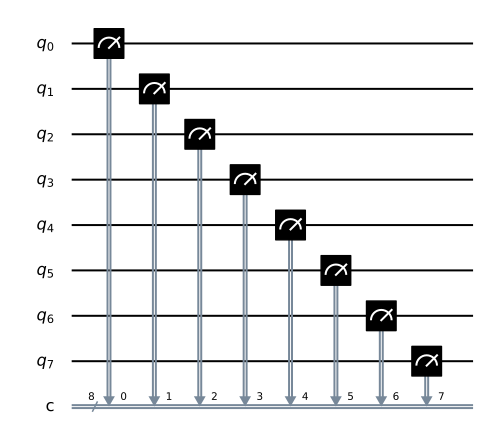

In [5]:
qc_output.draw()

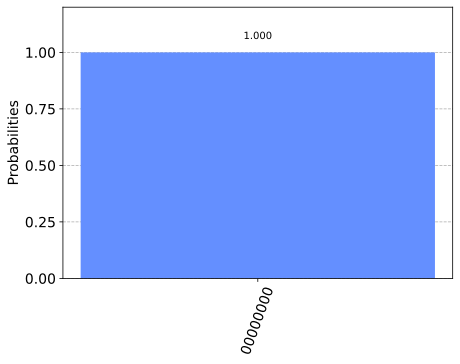

In [6]:
n_shots = 10000
res = execute(qc_output, Aer.get_backend('qasm_simulator'), shots=n_shots)
counts = res.result().get_counts()
plot_histogram(counts)

## **Half Adder**

Encoder

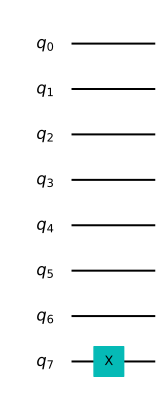

In [7]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)
qc_encode.draw()

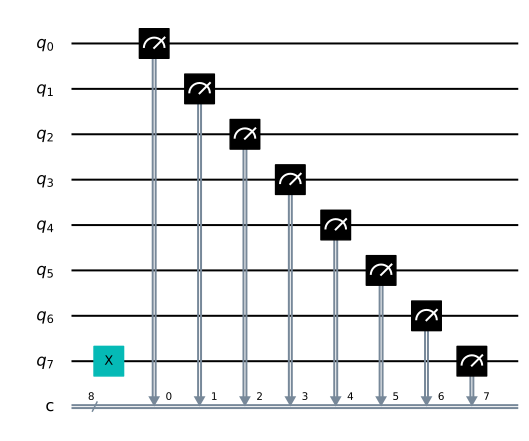

In [8]:
qc = qc_encode + qc_output
qc.draw()

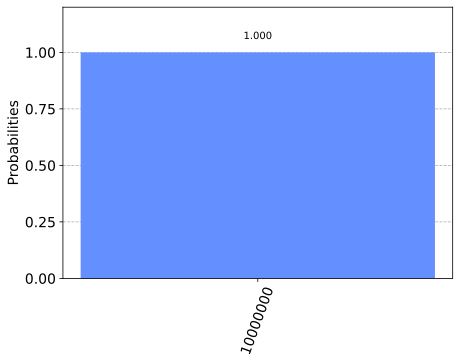

In [9]:
n_shots = 10000
counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=n_shots).result().get_counts()
plot_histogram(counts)

### Test: 1+1

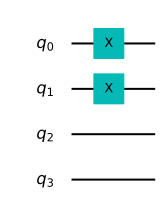

In [10]:
qc_encode_test = QuantumCircuit(4)
qc_encode_test.x(0)
qc_encode_test.x(1)
qc_encode_test.draw()

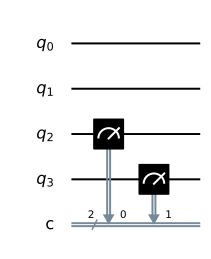

In [11]:
qc_output_test = QuantumCircuit(4,2)
qc_output_test.measure(2,0)
qc_output_test.measure(3,1)
qc_output_test.draw()

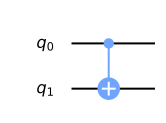

In [12]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

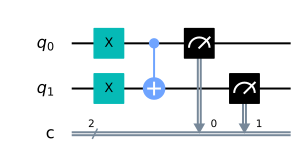

In [13]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.x(1)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

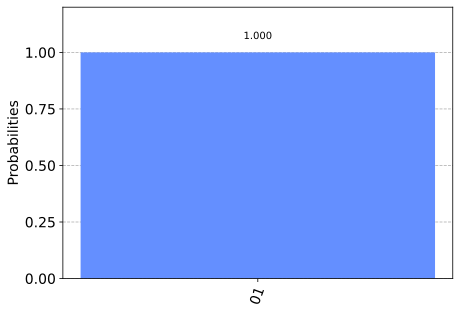

In [14]:
n_shots = 10000
counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=n_shots).result().get_counts()
plot_histogram(counts)

Final half adder circuit

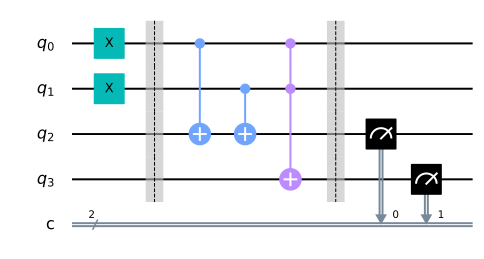

In [6]:
qc_ha = QuantumCircuit(4,2)
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.ccx(0,1,3)
qc_ha.barrier()
qc_ha.measure(2,0)
qc_ha.measure(3,1)
qc_ha.draw()

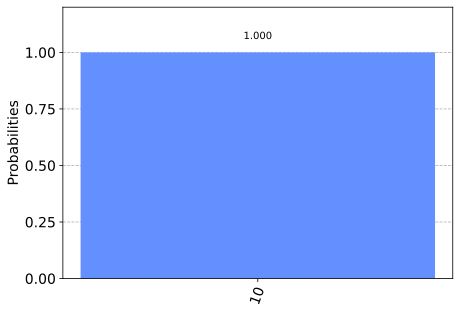

In [16]:
n_shots = 10000
counts = execute(qc_ha, Aer.get_backend('qasm_simulator'), shots=n_shots).result().get_counts()
plot_histogram(counts)

In [17]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.1',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.8.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.20.0'}

## **Full Adder**

Da vedere dopo, serve la Fourier Transform per fare l'OR!

Two half adder concatenated, in order to take care of carry bits from previous computations. I will redefine every circuit in order to make it more flexible

General half adder, no encoding

In [ ]:
qc_ha = QuantumCircuit(4,2)
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.ccx(0,1,3)

In [ ]:
qc_fa = QuantumCircuit(8,2)
qc_fa.measure(7)
